#Welcome
In the following, you can run an autoencoder and learn about the effect of hyperparameters

#Task 1
First execute the program. Press shift and hit enter until you reach the last block

First, we need to import some libraries


In [0]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Now, we get the handwritten digits dataset

In [0]:
# Import MNIST data set (handwritten digits)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

#Task 2
Here, we define our input parameters.
There is only one neuron in num_hidden_2. The network can not really learn the distribution of the handwritten digits. 
##a) Adjust the layer size
Try out different integer values (0 < num_hidden_2 < 128) for num_hidden_2 and see if you get better results.
##b) Increase training time
Once you finished a) you can increase the number of training steps to get even better results.
Try to set num_steps = 20000

In [0]:
# Training Parameters
learning_rate = 0.01
num_steps = 20000
batch_size = 128

display_step = 500
examples_to_show = 10

# Network Parameters
num_hidden_1 = 128 # 1st layer num features
num_hidden_2 = 64 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

In [0]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
E = tf.placeholder("float", [None, num_hidden_2])

In [0]:
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [0]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


In [0]:
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [0]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
decoder_only = decoder(E)

print(encoder_op)
print(decoder_op)
print(decoder_only)



Tensor("Sigmoid_25:0", shape=(?, 64), dtype=float32)
Tensor("Sigmoid_27:0", shape=(?, 784), dtype=float32)
Tensor("Sigmoid_29:0", shape=(?, 784), dtype=float32)


In [0]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [0]:
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


In [0]:
    # Start Training
    # Start a new TF session
    sess = tf.Session()

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    

Step 1: Minibatch Loss: 0.432125
Step 500: Minibatch Loss: 0.120935
Step 1000: Minibatch Loss: 0.096211
Step 1500: Minibatch Loss: 0.083479
Step 2000: Minibatch Loss: 0.075767
Step 2500: Minibatch Loss: 0.068881
Step 3000: Minibatch Loss: 0.066151
Step 3500: Minibatch Loss: 0.062871
Step 4000: Minibatch Loss: 0.055383
Step 4500: Minibatch Loss: 0.053504
Step 5000: Minibatch Loss: 0.054260
Step 5500: Minibatch Loss: 0.051347
Step 6000: Minibatch Loss: 0.050540
Step 6500: Minibatch Loss: 0.049116
Step 7000: Minibatch Loss: 0.050619
Step 7500: Minibatch Loss: 0.046158
Step 8000: Minibatch Loss: 0.047079
Step 8500: Minibatch Loss: 0.044579
Step 9000: Minibatch Loss: 0.042738
Step 9500: Minibatch Loss: 0.044144
Step 10000: Minibatch Loss: 0.040189
Step 10500: Minibatch Loss: 0.041767
Step 11000: Minibatch Loss: 0.038785
Step 11500: Minibatch Loss: 0.039493
Step 12000: Minibatch Loss: 0.038043
Step 12500: Minibatch Loss: 0.038371
Step 13000: Minibatch Loss: 0.036160
Step 13500: Minibatch Los

Original Images


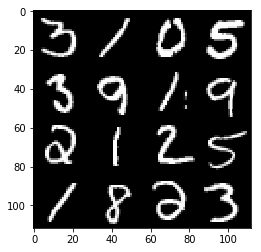

Reconstructed Images


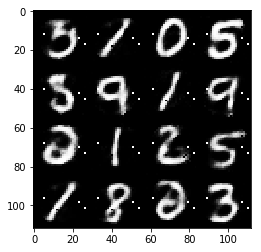

In [0]:
print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

#Task 3
With the following lines, you can create encodings from an input pic.
##a) Get encoding
At the moment we calculate the encoding for the first picture. Try to get the encoding for the 10th input picture
##b) Get 100 encodings
Try to print all 100 encodings of the first batch in our test data


In [0]:
  batch_x, _ = mnist.test.next_batch(100) 
  encodings = []
  for x in range(100):
    my_encoding = sess.run(encoder_op, feed_dict={X: [batch_x[x]]})
    #print (my_encoding)
    encodings.append(my_encoding)
  print(encodings)

[array([[4.2778885e-01, 0.0000000e+00, 8.0829322e-02, 1.0000000e+00,
        1.2315184e-02, 1.0132790e-06, 2.6026475e-01, 9.9999100e-01,
        3.3557415e-04, 1.0000000e+00, 9.9998707e-01, 1.0000000e+00,
        1.3113022e-06, 1.0000000e+00, 4.1501850e-02, 2.3841858e-07,
        5.6624413e-07, 2.3953667e-01, 8.7508976e-01, 5.3644180e-07,
        9.9999923e-01, 8.4872270e-01, 9.9999869e-01, 9.0777874e-03,
        8.8312703e-01, 9.9383914e-01, 0.0000000e+00, 9.9999976e-01,
        1.2398553e-01, 1.8952191e-02, 9.6541584e-01, 1.0000000e+00,
        4.1783872e-01, 9.9997658e-01, 1.0000000e+00, 7.1699971e-01,
        1.0000000e+00, 5.9604645e-08, 9.9963135e-01, 0.0000000e+00,
        9.9999988e-01, 3.4042746e-01, 9.0301037e-06, 9.9950200e-01,
        1.1200291e-01, 6.5588921e-02, 5.2680552e-02, 6.7156148e-01,
        2.4910748e-01, 9.9999958e-01, 9.9983037e-01, 1.0000000e+00,
        3.2073766e-02, 9.9953204e-01, 0.0000000e+00, 9.9989927e-01,
        6.9057870e-01, 9.9999994e-01, 8.2113469

Note, that the dimensionality of the encodings is matching with your num_hidden_2 parameter you defined above.

#Task 4
Play around with the encodings
You can use the following code to generate images from encodings.
What effect does each dimension have on the the generated picture?

(1, 784)
Generated Images


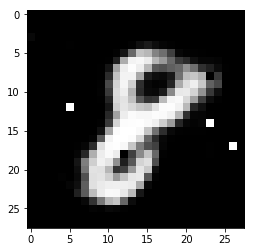

(1, 784)
Generated Images


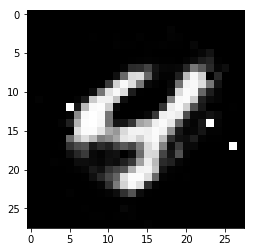

(1, 784)
Generated Images


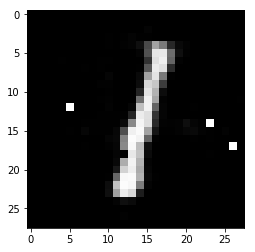

(1, 784)
Generated Images


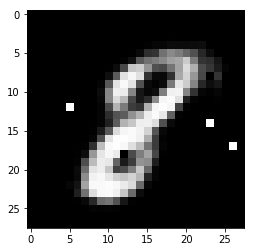

(1, 784)
Generated Images


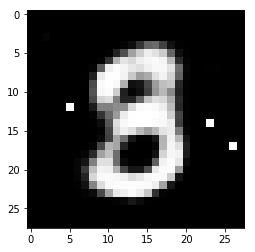

(1, 784)
Generated Images


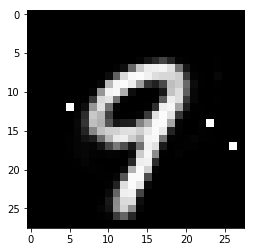

(1, 784)
Generated Images


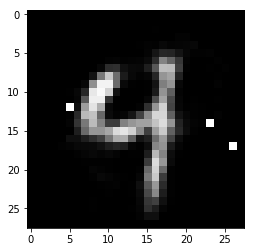

(1, 784)
Generated Images


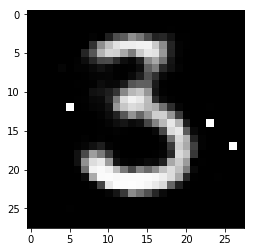

(1, 784)
Generated Images


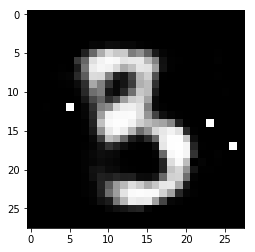

(1, 784)
Generated Images


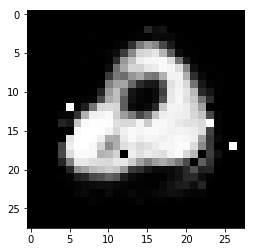

(1, 784)
Generated Images


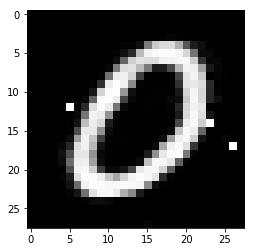

(1, 784)
Generated Images


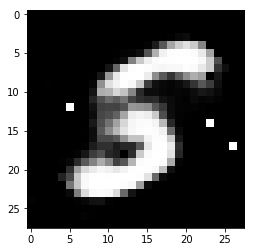

(1, 784)
Generated Images


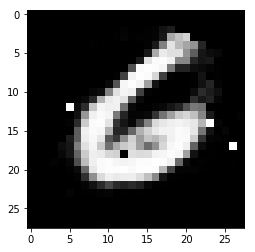

(1, 784)
Generated Images


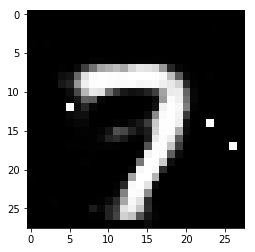

(1, 784)
Generated Images


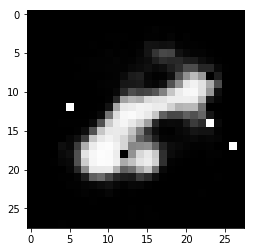

(1, 784)
Generated Images


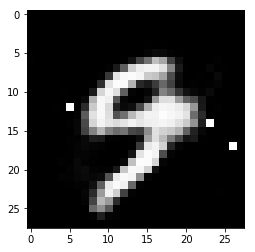

(1, 784)
Generated Images


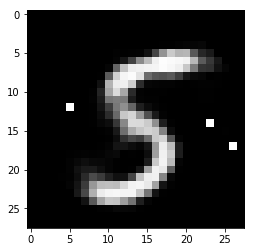

(1, 784)
Generated Images


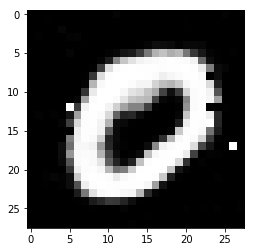

(1, 784)
Generated Images


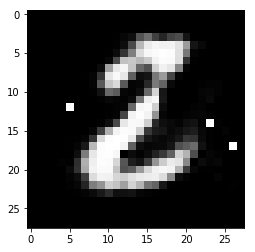

(1, 784)
Generated Images


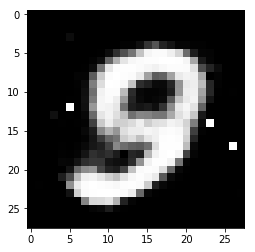

(1, 784)
Generated Images


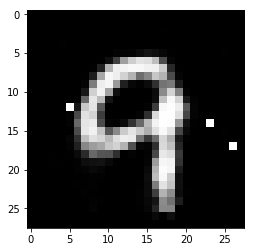

(1, 784)
Generated Images


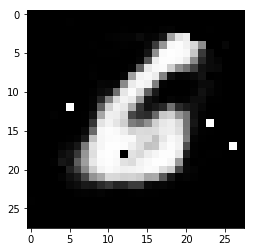

(1, 784)
Generated Images


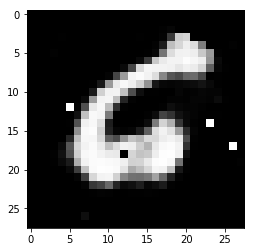

(1, 784)
Generated Images


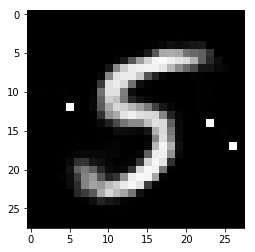

(1, 784)
Generated Images


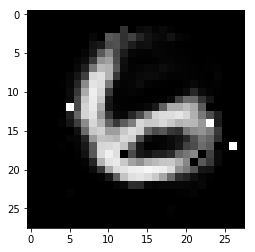

(1, 784)
Generated Images


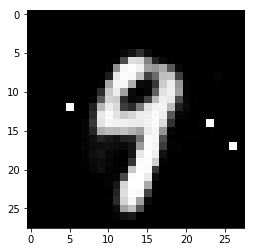

(1, 784)
Generated Images


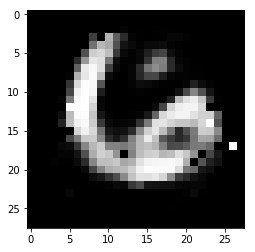

(1, 784)
Generated Images


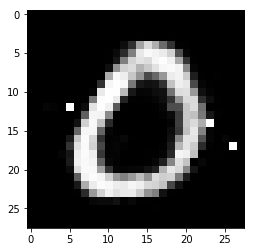

(1, 784)
Generated Images


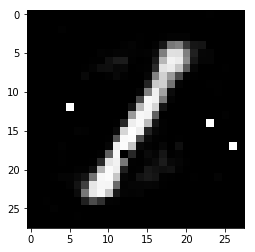

(1, 784)
Generated Images


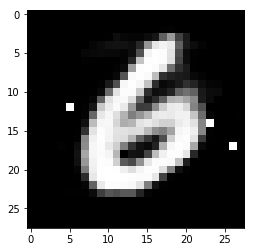

(1, 784)
Generated Images


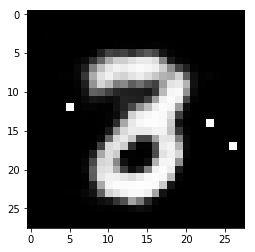

(1, 784)
Generated Images


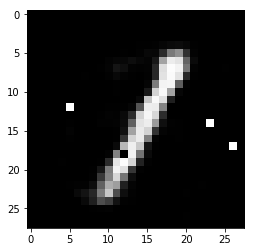

(1, 784)
Generated Images


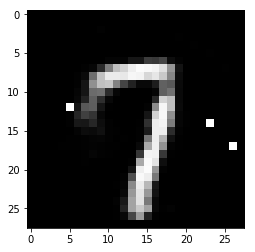

(1, 784)
Generated Images


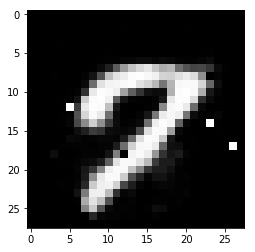

(1, 784)
Generated Images


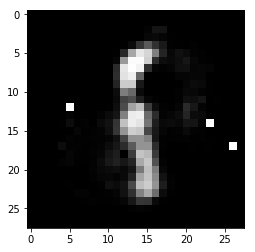

(1, 784)
Generated Images


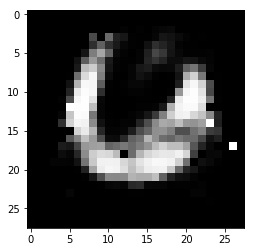

(1, 784)
Generated Images


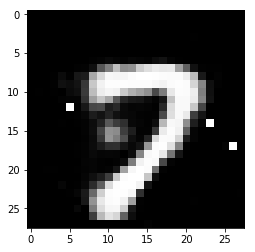

(1, 784)
Generated Images


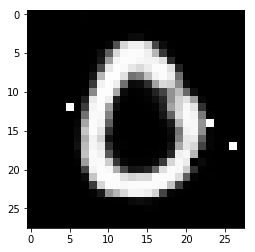

(1, 784)
Generated Images


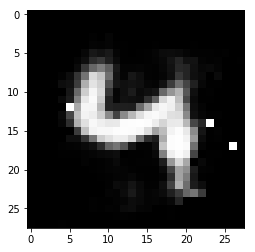

(1, 784)
Generated Images


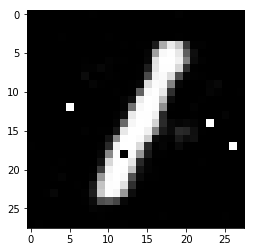

(1, 784)
Generated Images


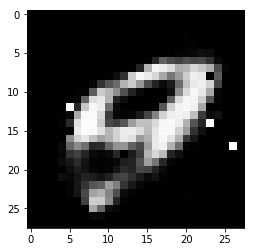

(1, 784)
Generated Images


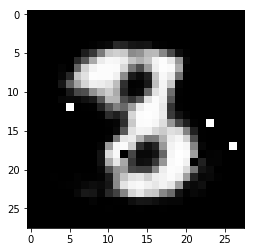

(1, 784)
Generated Images


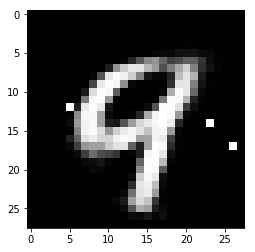

(1, 784)
Generated Images


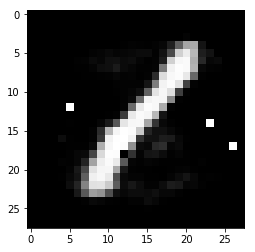

(1, 784)
Generated Images


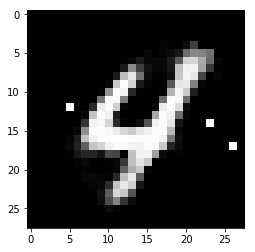

(1, 784)
Generated Images


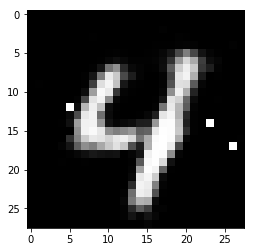

(1, 784)
Generated Images


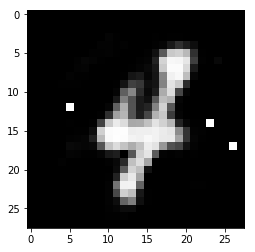

(1, 784)
Generated Images


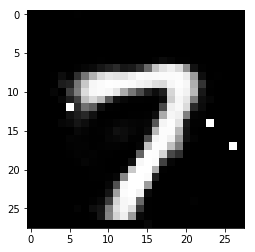

(1, 784)
Generated Images


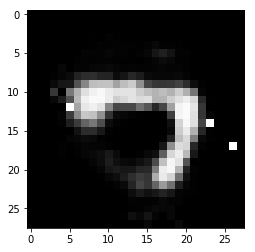

(1, 784)
Generated Images


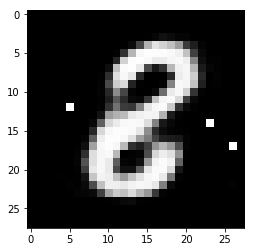

(1, 784)
Generated Images


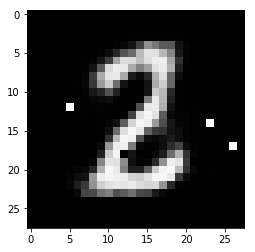

(1, 784)
Generated Images


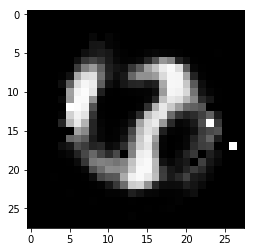

(1, 784)
Generated Images


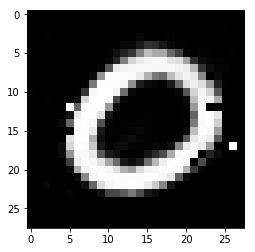

(1, 784)
Generated Images


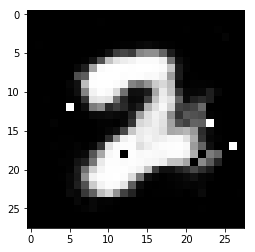

(1, 784)
Generated Images


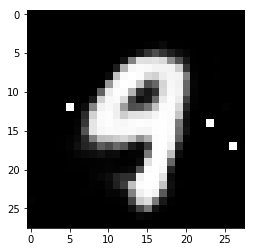

(1, 784)
Generated Images


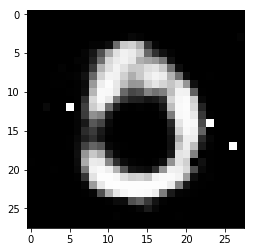

(1, 784)
Generated Images


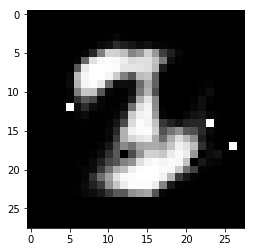

(1, 784)
Generated Images


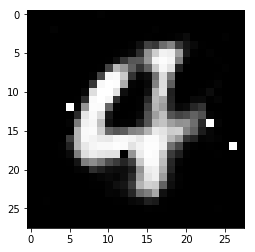

(1, 784)
Generated Images


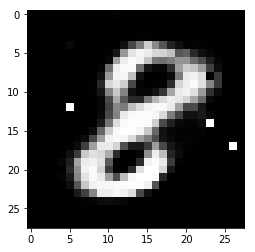

(1, 784)
Generated Images


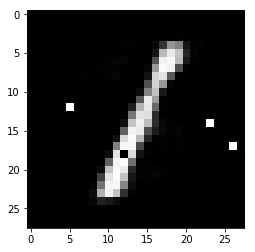

(1, 784)
Generated Images


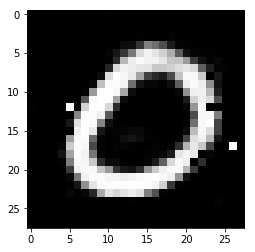

(1, 784)
Generated Images


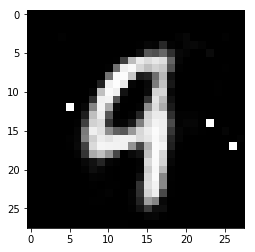

(1, 784)
Generated Images


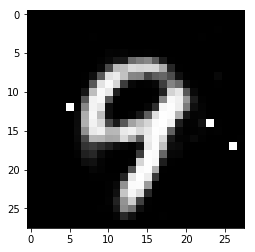

(1, 784)
Generated Images


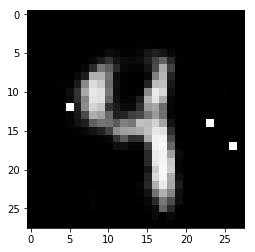

(1, 784)
Generated Images


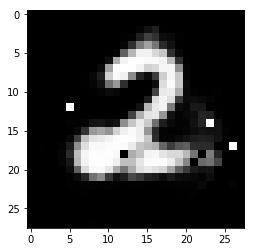

(1, 784)
Generated Images


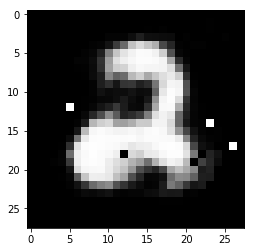

(1, 784)
Generated Images


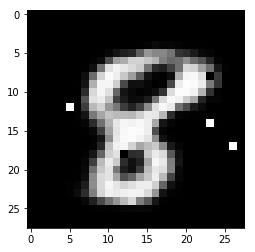

(1, 784)
Generated Images


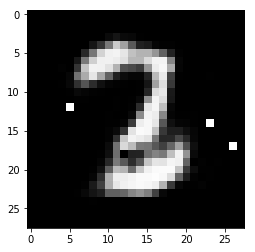

(1, 784)
Generated Images


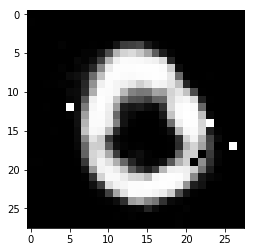

(1, 784)
Generated Images


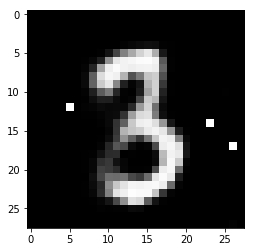

(1, 784)
Generated Images


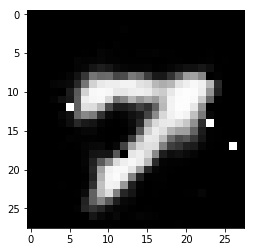

(1, 784)
Generated Images


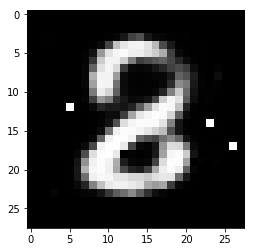

(1, 784)
Generated Images


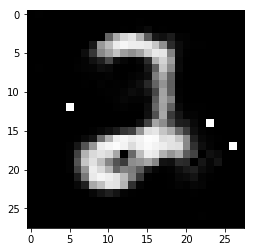

(1, 784)
Generated Images


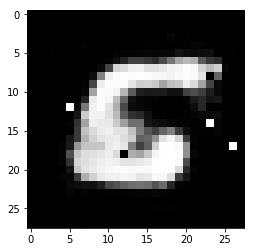

(1, 784)
Generated Images


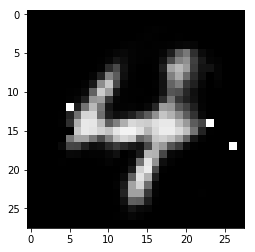

(1, 784)
Generated Images


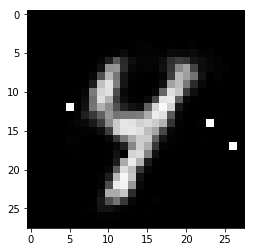

(1, 784)
Generated Images


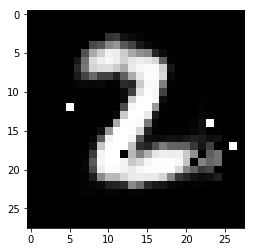

(1, 784)
Generated Images


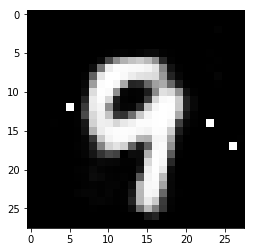

(1, 784)
Generated Images


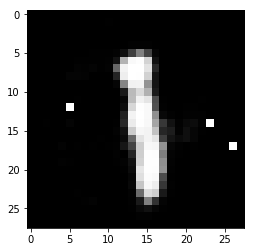

(1, 784)
Generated Images


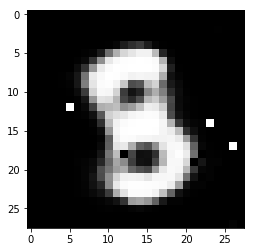

(1, 784)
Generated Images


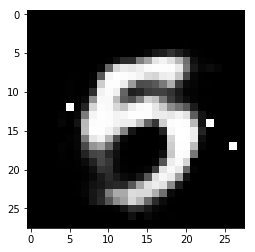

(1, 784)
Generated Images


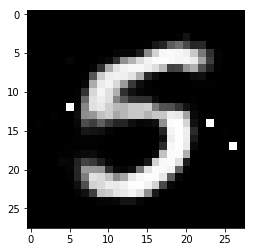

(1, 784)
Generated Images


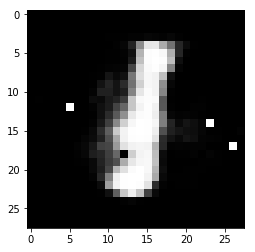

(1, 784)
Generated Images


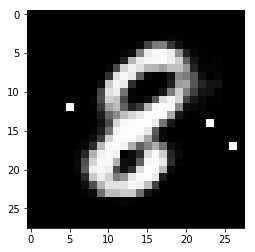

(1, 784)
Generated Images


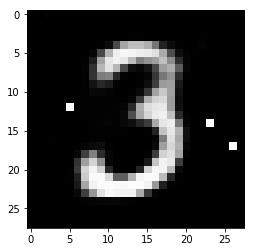

(1, 784)
Generated Images


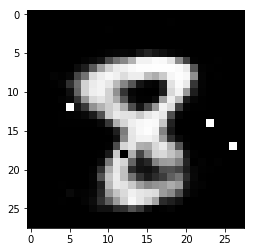

(1, 784)
Generated Images


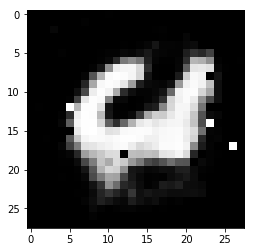

(1, 784)
Generated Images


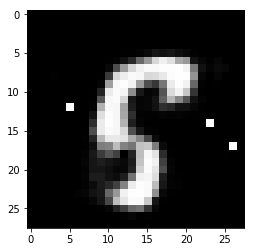

(1, 784)
Generated Images


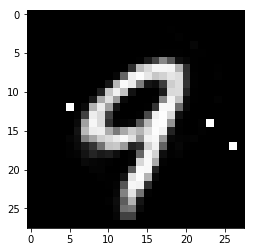

(1, 784)
Generated Images


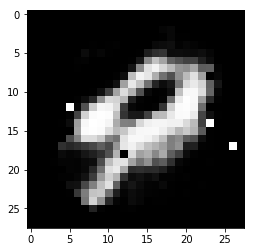

(1, 784)
Generated Images


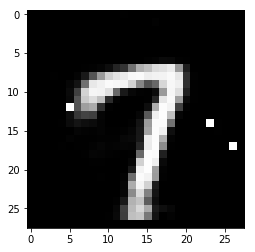

(1, 784)
Generated Images


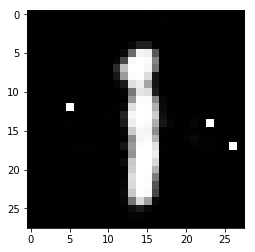

(1, 784)
Generated Images


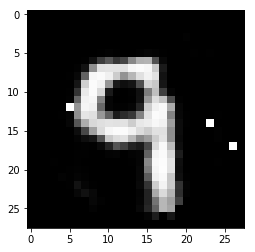

(1, 784)
Generated Images


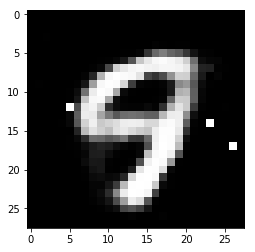

(1, 784)
Generated Images


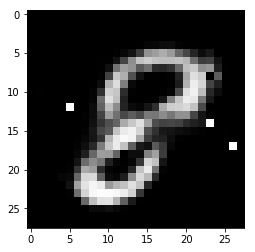

(1, 784)
Generated Images


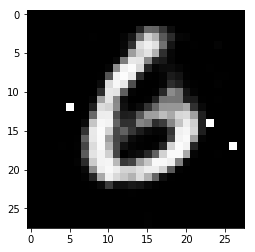

(1, 784)
Generated Images


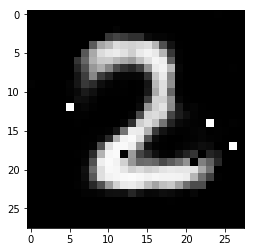

(1, 784)
Generated Images


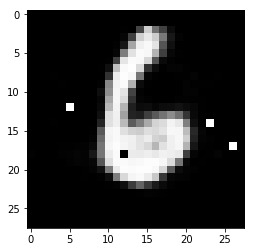

(1, 784)
Generated Images


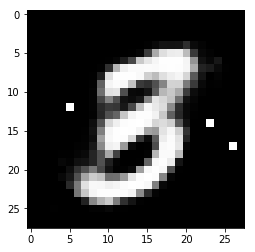

(1, 784)
Generated Images


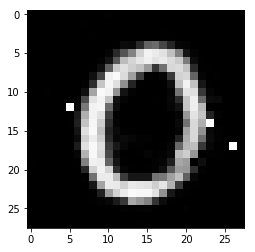

In [0]:
#batch_x = [list(range(0, num_hidden_2))]
for i, x in enumerate(encodings):
  generated_pic = sess.run(decoder_only, feed_dict={E: x})
  print (generated_pic.shape)
  generated_pic = generated_pic.reshape([28, 28])
  #print (generated_pic)

  print("Generated Images")
  plt.figure(figsize=(n, n))
  plt.imshow(generated_pic, origin="upper", cmap="gray")
  plt.show()
